## Observations and Insights

## Dependencies and starter code

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID'])

# Print to check merge
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


## Bar plots

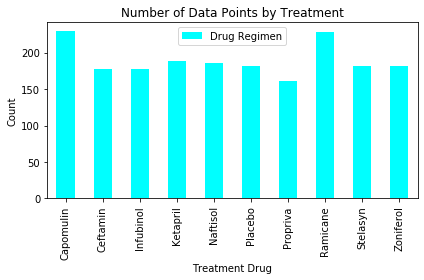

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Group the column 'Drug Regimen' 
regimen = data.groupby('Drug Regimen')

# Count the number of data points for each treatment type in 'Drug Regimen' df
regimen_count = pd.DataFrame(regimen['Drug Regimen'].count())

# Create a bar chart from the 'Drug Regiman' df and add title with `DataFrame.plot()`
chart = regimen_count.plot(kind='bar', title='Number of Data Points by Treatment', color='cyan')

# Name the x and y-axis labels
chart.set_xlabel('Treatment Drug')
chart.set_ylabel('Count')
plt.tight_layout()

# Save chart as png
plt.savefig('charts/Pandas_Bar_Chart.png', dpi=300, bbox_inches='tight')

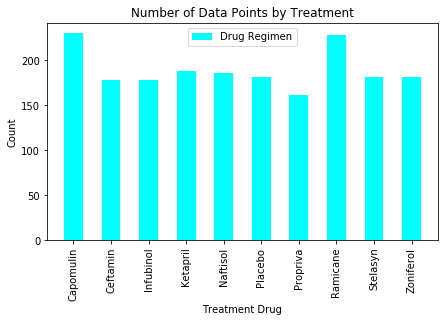

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(regimen_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(7,4))
plt.bar(x_axis, regimen_count['Drug Regimen'], color='cyan', align="center", width = 0.5)
plt.xticks(tick_locations, list(regimen_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(regimen_count['Drug Regimen'])*1.05)

# Set a title and labels
plt.title('Number of Data Points by Treatment')
plt.xlabel('Treatment Drug')
plt.ylabel('Count')

column_name = ['Drug Regimen']
plt.legend(column_name,loc="best")

# Save the figure
plt.savefig('charts/Pyplot_Bar_Chart.png', dpi=300, bbox_inches='tight')
plt.show()

## Pie plots

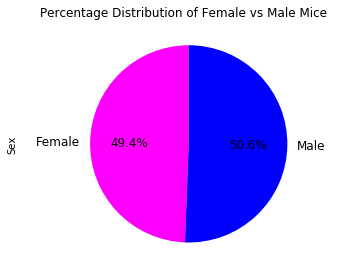

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a dataframe grouping-by the 'Sex' column
gender = data.groupby('Sex')

# Count the data points for each gender in dataframe
gender_count = pd.DataFrame(gender['Sex'].count())

# Create a pie chart based off of the group using `DataFrame.plot()`
gender_count.plot(kind='pie', subplots=True, \
                        title='Percentage Distribution of Female vs Male Mice',startangle=90,\
                        autopct='%1.1f%%',shadow=False, fontsize=12, colors =['magenta','blue'],legend =False)

# Make the axis 'equal' for a round pie chart
plt.axis('equal')
plt.savefig('charts/Pandas_Pie_Chart.png', dpi=300, bbox_inches='tight')
plt.show()

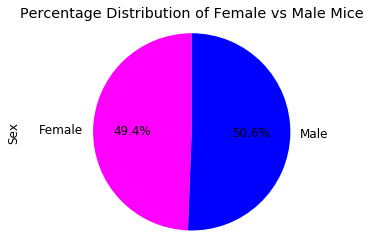

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Find the list of index values in the groupby dataframe for labels
genders = list(gender_count.index.values)

# Set the values of each section of the pie chart
gender_counts = gender_count['Sex']

# 'Pyplot' returns the percentages for the values, set colors
plt.pie(gender_counts, labels=genders, colors=['magenta','blue'],
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.rcParams['font.size'] = 12
plt.title('Percentage Distribution of Female vs Male Mice')
plt.ylabel('Sex')
plt.axis('equal')
plt.savefig('charts/Pyplot_Pie_Chart.png', dpi=300, bbox_inches='tight')
plt.show()

## Quartiles, outliers and boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Select four treatments to compare and add combine them in a list
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Call in the merged dataframe and use the list to narrow the results down to the four treatments
treatments = data[data['Drug Regimen'].isin(treatment_list)]

# View the dataframe
treatments.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [ ]:
# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
four_last_tumor

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen